In [2]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm 

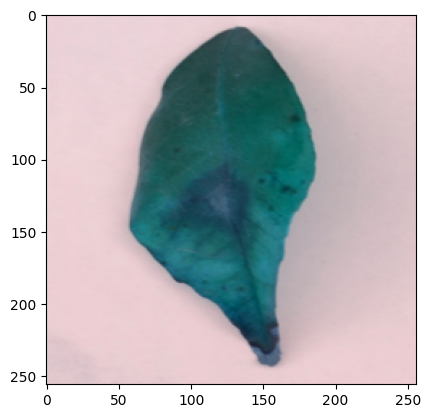

In [3]:
DATADIR = "/Users/trannhi/Downloads/Citrus_CNN/Citrus_Plant_Dataset/Citrus/Leaves"
CATEGORIES = ["BLACKSPOT", "CANKER", "GREENING", "HEALTHY", "MELANOSE"]
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [4]:
print(img_array)

[[[235 210 215]
  [236 210 217]
  [236 210 216]
  ...
  [231 205 211]
  [232 206 212]
  [232 206 212]]

 [[234 211 216]
  [234 212 216]
  [234 211 216]
  ...
  [231 205 211]
  [231 205 211]
  [231 205 211]]

 [[235 212 216]
  [234 211 215]
  [235 211 215]
  ...
  [231 206 210]
  [231 206 210]
  [231 205 211]]

 ...

 [[225 201 205]
  [226 200 205]
  [226 200 206]
  ...
  [235 205 210]
  [235 205 210]
  [234 204 209]]

 [[226 201 206]
  [226 201 205]
  [226 201 205]
  ...
  [235 205 210]
  [235 204 210]
  [235 205 210]]

 [[227 200 207]
  [226 200 206]
  [226 200 206]
  ...
  [234 205 210]
  [234 205 210]
  [235 205 210]]]


In [5]:
print(img_array.shape)

(256, 256, 3)


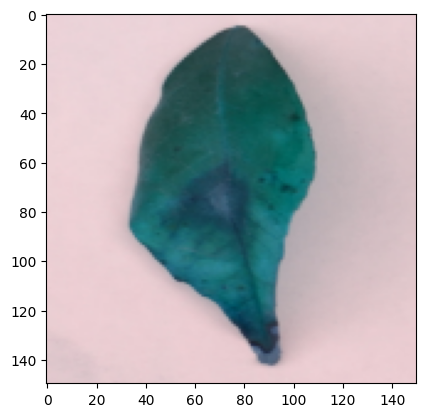

In [6]:
IMG_SIZE = 150
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.COLOR_BGR2RGB)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num])
            except Exception as e:  
                pass

create_training_data()

print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 39.45it/s]

609


In [8]:
import random
random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

2
1
1
0
0
1
3
1
0
0


In [11]:
X = []
y = []

for features, labels in training_data:
    X.append(features)
    y.append(labels)
X= np.array(X)
print(X.shape)

(609, 150, 150, 3)


In [12]:
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()